In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/av-janata-hack-payment-default-prediction/train_20D8GL3.csv
/kaggle/input/av-janata-hack-payment-default-prediction/test_O6kKpvt.csv
/kaggle/input/av-janata-hack-payment-default-prediction/sample_submission_gm6gE0l.csv


In [55]:
train= pd.read_csv("/kaggle/input/av-janata-hack-payment-default-prediction/train_20D8GL3.csv")
test= pd.read_csv("/kaggle/input/av-janata-hack-payment-default-prediction/test_O6kKpvt.csv")
submission= pd.read_csv("/kaggle/input/av-janata-hack-payment-default-prediction/sample_submission_gm6gE0l.csv")

In [6]:
train.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,25150,360000,2,2,2,25,-1,-1,-1,-1,...,3435,8870,2020,12590,3479,3446,8870,2020,27043,0
1,13470,240000,2,1,2,46,2,2,-2,-1,...,2240,1681,2267,0,0,2240,0,2267,3074,0
2,3092,320000,2,2,1,41,0,0,0,0,...,35409,35036,35939,5000,2000,2000,3000,3000,1500,0
3,13973,50000,2,2,2,24,-1,-1,-2,-2,...,0,0,0,0,0,0,0,0,0,1
4,10567,80000,1,3,1,52,-1,0,0,0,...,20561,21261,21457,1500,1500,1500,1028,876,1449,0


In [7]:
test.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,10178,60000,2,2,1,30,0,0,0,0,...,38117,38874,38667,39544,1628,1618,1375,1403,1520,1205
1,5304,200000,2,1,2,29,0,0,0,0,...,76593,93988,50292,10510,4160,14593,20150,0,5739,12050
2,5187,230000,1,1,2,39,0,0,0,0,...,20650,0,0,0,2500,2000,0,0,0,0
3,14495,150000,1,1,2,40,0,0,0,0,...,145978,139791,142745,146872,5800,5245,5200,5200,6500,7200
4,20444,140000,1,2,2,27,0,0,0,0,...,76230,77954,78953,81848,10000,10000,3393,3260,5000,3000


In [8]:
train.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default_payment_next_month    0
dtype: int64

In [9]:
test.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
dtype: int64

# There is no null values in train and test data

In [10]:
train.dtypes, test.dtypes

(ID                            int64
 LIMIT_BAL                     int64
 SEX                           int64
 EDUCATION                     int64
 MARRIAGE                      int64
 AGE                           int64
 PAY_0                         int64
 PAY_2                         int64
 PAY_3                         int64
 PAY_4                         int64
 PAY_5                         int64
 PAY_6                         int64
 BILL_AMT1                     int64
 BILL_AMT2                     int64
 BILL_AMT3                     int64
 BILL_AMT4                     int64
 BILL_AMT5                     int64
 BILL_AMT6                     int64
 PAY_AMT1                      int64
 PAY_AMT2                      int64
 PAY_AMT3                      int64
 PAY_AMT4                      int64
 PAY_AMT5                      int64
 PAY_AMT6                      int64
 default_payment_next_month    int64
 dtype: object,
 ID           int64
 LIMIT_BAL    int64
 SEX          int64

# All variables in train and test are numericals no categoricals

# Basic EDA

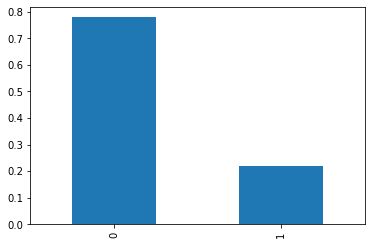

In [11]:
#target variable
train['default_payment_next_month'].value_counts(normalize= True).plot(kind= 'bar')

morethan 75% are not defaulters from train

In [12]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV

In [57]:
X= train.drop(columns= ["default_payment_next_month", "ID"])
y= train['default_payment_next_month']
test_o= test
test= test.drop(columns= ["ID"])

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [44]:
#logistic regression
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred= clf.predict(X_test)
roc_auc_score(y_test, y_pred)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.5005236572648442

In [43]:
#logistic regression with CV
clf = LogisticRegressionCV(cv=3)
clf.fit(X_train, y_train)
y_pred= clf.predict(X_test)
roc_auc_score(y_test, y_pred)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.5004221138042431

In [42]:
#logistic regression with Gridsearch
lg = LogisticRegression()
grid_values = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}
clf = GridSearchCV(lg, param_grid=grid_values)
clf.fit(X_train, y_train)
y_pred= clf.predict(X_test)
roc_auc_score(y_test, y_pred)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS 

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.5003205703436419

In [53]:
#RandomForest Classifier

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred= clf.predict(X_test)
print(roc_auc_score(y_test, y_pred))
predicted= clf.predict(test)


0.6575396609865302


# Best algorithm is RandomForest from results

In [60]:
sub= pd.DataFrame()
sub['ID']= test_o['ID']
sub['default_payment_next_month']= predicted
sub.to_csv("RandomForectClassifer.csv", index= False)

In [40]:
#GradientBoosting Classifier

from sklearn.ensemble import GradientBoostingClassifier

clf= GradientBoostingClassifier()
clf.fit(X_train, y_train)
y_pred= clf.predict(X_test)
roc_auc_score(y_test, y_pred)

0.6599926440027959

In [39]:
#ExtraTree Classifier

from sklearn.ensemble import ExtraTreesClassifier

clf= ExtraTreesClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred= clf.predict(X_test)
roc_auc_score(y_test, y_pred)

0.6550329543951788

In [38]:
#DecisionTree Classifier

from sklearn.tree import DecisionTreeClassifier

clf= DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred= clf.predict(X_test)
roc_auc_score(y_test, y_pred)

0.605649181512478

In [27]:
#Support vector classifier

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)
y_pred= clf.predict(X_test)
roc_auc_score(y_test, y_pred)

0.6488942979804658

In [32]:
#LinearDiscriminantAnalysis

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)
y_pred= clf.predict(X_test)
roc_auc_score(y_test, y_pred)

0.6150000354221374

In [35]:
#all classfiers (42)
from sklearn.base import ClassifierMixin
from sklearn.utils.testing import all_estimators
classifiers=[est for est in all_estimators() if issubclass(est[1], ClassifierMixin)]
print(classifiers)
#len(classifiers)

[('AdaBoostClassifier', <class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'>), ('BaggingClassifier', <class 'sklearn.ensemble._bagging.BaggingClassifier'>), ('BernoulliNB', <class 'sklearn.naive_bayes.BernoulliNB'>), ('CalibratedClassifierCV', <class 'sklearn.calibration.CalibratedClassifierCV'>), ('CategoricalNB', <class 'sklearn.naive_bayes.CategoricalNB'>), ('CheckingClassifier', <class 'sklearn.utils._mocking.CheckingClassifier'>), ('ClassifierChain', <class 'sklearn.multioutput.ClassifierChain'>), ('ComplementNB', <class 'sklearn.naive_bayes.ComplementNB'>), ('DecisionTreeClassifier', <class 'sklearn.tree._classes.DecisionTreeClassifier'>), ('DummyClassifier', <class 'sklearn.dummy.DummyClassifier'>), ('ExtraTreeClassifier', <class 'sklearn.tree._classes.ExtraTreeClassifier'>), ('ExtraTreesClassifier', <class 'sklearn.ensemble._forest.ExtraTreesClassifier'>), ('GaussianNB', <class 'sklearn.naive_bayes.GaussianNB'>), ('GaussianProcessClassifier', <class 'sklearn.gaussian_

42

In [37]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]


for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = roc_auc_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
print("="*30)

KNeighborsClassifier
****Results****
Accuracy: 54.4874%
SVC
****Results****
Accuracy: 50.0000%
DecisionTreeClassifier
****Results****
Accuracy: 60.1321%
RandomForestClassifier
****Results****
Accuracy: 66.2253%
AdaBoostClassifier
****Results****
Accuracy: 64.1889%
GradientBoostingClassifier
****Results****
Accuracy: 66.0458%
GaussianNB
****Results****
Accuracy: 56.0466%
LinearDiscriminantAnalysis
****Results****
Accuracy: 61.5000%
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 59.5262%
